# Topic to be covered
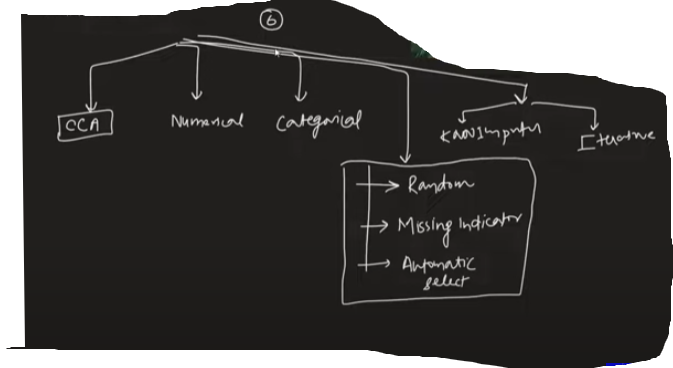

# Random Value Imputation

1. Preserves the variance of th variables(but why?)
2. Memory heavy for deployment, as we need to store the original training set to extract values from and replace the NA in coming observations
3. Well suited for linear models as it does not distort the distribution,regardies of the % of NA

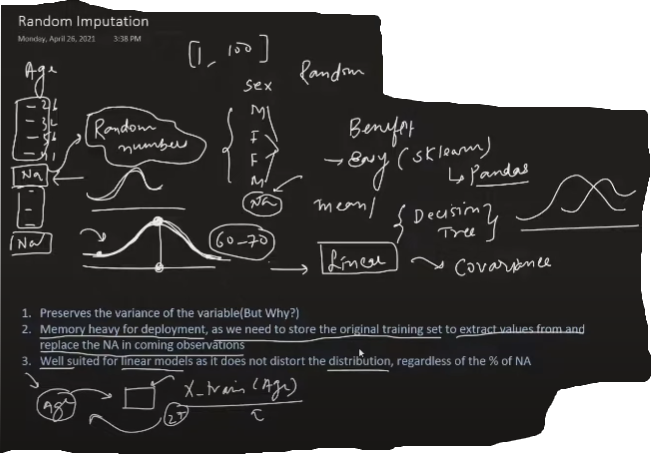

## Respected code

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train_d38.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.head(5)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [9]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [10]:
x_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [16]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

x_test['Age_imputed'][x_test['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

In [18]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([34.  , 17.  , 24.  , 32.  , 16.  , 25.  , 42.  , 18.  , 30.  ,
        7.  , 42.  , 32.5 , 58.  ,  7.  , 45.5 , 25.  , 36.  , 37.  ,
       47.  , 70.  , 25.  , 50.  , 59.  , 25.  , 39.  , 22.  , 17.  ,
       22.  , 18.  , 30.5 , 18.  , 23.  , 19.  , 51.  , 42.  , 19.  ,
       52.  , 18.  , 20.  , 23.5 , 14.  , 54.  , 50.  , 33.  , 50.  ,
       12.  , 39.  , 32.  , 47.  , 19.  , 18.  , 23.  , 24.  , 43.  ,
       39.  , 16.  , 27.  , 39.  , 37.  , 27.  , 17.  , 34.  ,  0.67,
       48.  , 28.  , 29.  , 25.  , 36.  , 40.  , 18.  , 29.  , 34.  ,
       19.  , 25.  ,  9.  , 22.  , 31.  , 39.  , 45.  , 29.  , 28.  ,
       21.  , 50.  , 33.  , 43.  , 42.  , 46.  ,  7.  , 33.  , 17.  ,
       27.  , 14.5 , 25.  , 23.  , 16.  , 29.  , 44.  , 24.  , 18.  ,
       37.  , 51.  , 16.  ,  1.  , 35.  , 32.  ,  0.75, 18.  , 16.  ,
        9.  , 22.  , 36.  , 11.  ,  4.  , 20.  ,  8.  , 26.  , 51.  ,
       47.  , 23.  , 32.  , 24.  , 32.  , 28.  , 33.  , 26.  , 62.  ,
       25.  , 45.  ,

In [19]:
x_train['Age'].isnull().sum()

148

In [20]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,24.0
493,71.0,49.5042,71.0
527,NaN,221.7792,33.0


C:\Users\trukk\AppData\Local\Temp\ipykernel_20864\3925229177.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)
C:\Users\trukk\AppData\Local\Temp\ipykernel_20864\3925229177.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[

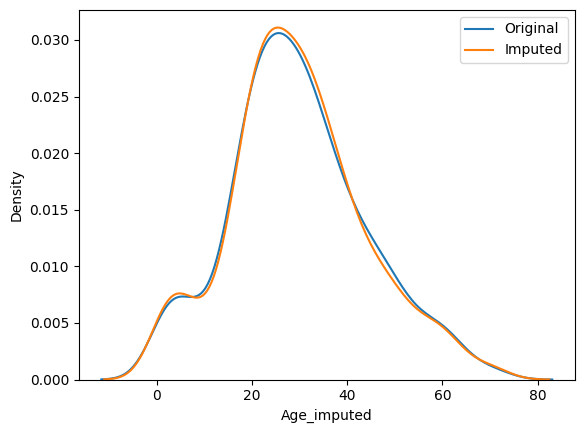

In [28]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [29]:
print('Original variable variance: ', x_train['Age'].var())
print('Variance after random imputation: ', x_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  202.18186059968554


In [30]:
x_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,72.219160
Age,71.512440,204.349513,204.349513
Age_imputed,72.219160,204.349513,202.181861


<Axes: >

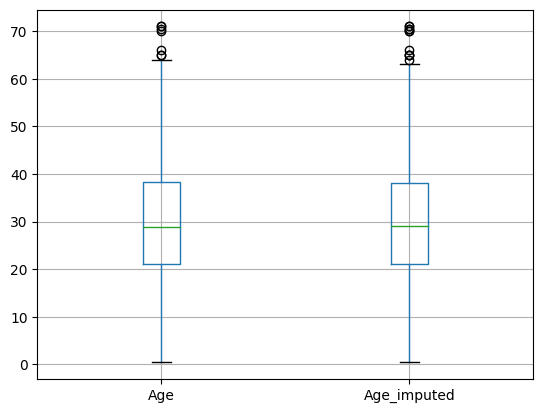

In [31]:
x_train[['Age', 'Age_imputed']].boxplot()

In [36]:
# sampled_value = x_train['Age'].dropna().sample(1, random_state=int(observation['Fare'])
data = pd.read_csv('house-train_d38.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [38]:
data.head(5)

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [39]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [40]:
x = data
y = data['SalePrice']

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [43]:
x_train['GarageQual_imputed'] = x_train['GarageQual']
x_test['GarageQual_imputed'] = x_test['GarageQual']

x_train['FireplaceQu_imputed'] = x_train['FireplaceQu']
x_test['FireplaceQu_imputed'] = x_test['FireplaceQu']

In [44]:
x_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1262,TA,TA,161500,TA,TA
409,Gd,TA,339750,TA,Gd
521,Gd,TA,150000,TA,Gd
131,TA,TA,244000,TA,TA
652,TA,TA,191000,TA,TA


In [45]:
x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values

x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_test['FireplaceQu_imputed'][x_test['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values

C:\Users\trukk\AppData\Local\Temp\ipykernel_20864\4277669966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
C:\Users\trukk\AppData\Local\Temp\ipykernel_20864\4277669966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values
C:\Users\trukk\AppData\Local\Temp\ipykernel_20864\4277669966.py:4: SettingWithCopyWarning: 
A

In [48]:
temp = pd.concat(
        [
            x_train['GarageQual'].value_counts() / len(x_train['GarageQual'].dropna()),
            x_train['GarageQual_imputed'].value_counts() / len(x_train)
        ],
        axis=1)
temp.columns = ['original', 'imputed']

In [49]:
temp

,original,imputed
TA,0.951043,0.948630
Fa,0.037171,0.040240
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [52]:

temp = pd.concat(
        [
            x_train['FireplaceQu'].value_counts() / len(x_train['FireplaceQu'].dropna()),
            x_train['FireplaceQu_imputed'].value_counts() / len(x_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']
temp

,original,imputed
Gd,0.494272,0.498288
TA,0.412439,0.406678
Fa,0.040917,0.041096
Po,0.027823,0.028253
Ex,0.024550,0.025685


C:\Users\trukk\AppData\Local\Temp\ipykernel_20864\2578983325.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\trukk\AppData\Local\Temp\ipykernel_20864\2578983325.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457a

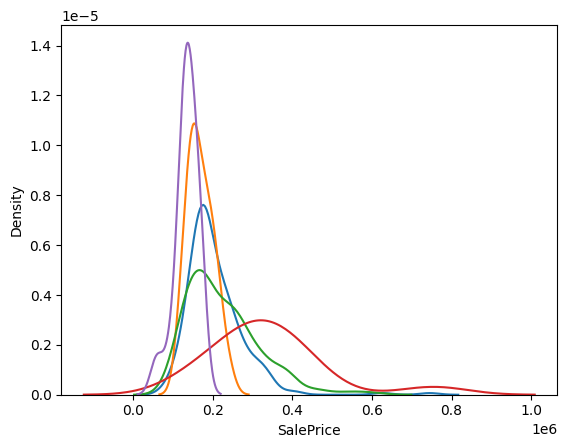

In [54]:
for category in x_train['FireplaceQu'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\trukk\AppData\Local\Temp\ipykernel_20864\484091634.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\trukk\AppData\Local\Temp\ipykernel_20864\484091634.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29

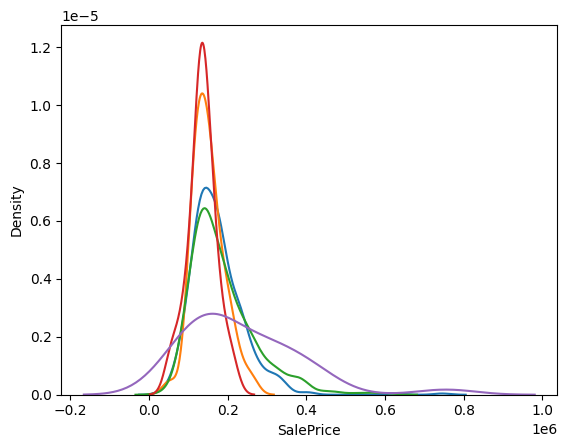

In [62]:
for category in x_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()